# A Simple Explanation of Why AUC = 1 is Equivalent to Random Guessing

In a binary classification problem, the outcome consists of only two possibilities, which we can call positive and negative, or A and B, or 0 and 1, etc. In the machne learning context, a classifier is trained on the training data to predict the outcome for a given set of features. The classifier predicts the probabilities for the outcome to be positive or negative. Based on a threshold, the predicted outcome is chosen to be positive or negative. For example, if the threshold is 0.65, and the classifier predicts 0.7 as the probability of a positive, then the predicted outcome is positive. But if it predicts 0.6, the predicted outcome is negative. Suppose we have a set of predictions  from a classifier for the probability of getting a positive. As the threshold is varied from 0 to 1, the predicted outcomes will also change and we get what is known as an AUC (Area Under Curve) or ROC curve.

One often hears the comment that an AUC of 0.5 is as good as random guessing. Recall that the AUC or ROC refers to a curve obtained by plotting the True Positive Rate ($TPR$) against the False Positive Rate ($FPR$) as the threshold is varied from 0 to 1.

Let me offer a simple explanation why this is true.

But before diving in, it will be useful to present the notation and the basic definitions.


# Basic Notation and Definitions

The following definitions will be familiar: 

* A "True Positive" occurs if the classifier predicts positive and the outcome is also positive. 
* A "False Positive" occurs if the classifier predicts positive and the outcome is negative. 
* A "True Negative" occurs if the classifier predicts negative and the outcome is indeed negative. 
* A "False Negative" occurs if the classifier predicts negative and the outcome is positive. 

### Notation

$TP=$ Number of True Positives

$FP=$ Number of False Positives

$TN=$ Number of True Negatives

$FN=$ Number of False Negatives

$TAP= TP+FN=$ Total Actual Positives

$TAN= TN+FP=$ Total Actual Negatives

$TPP=TP+FP=$ Total Predicted Positives

$TPN=TN+FN=$ Total Predicted Negatives



### Precision

This is defined as:

$\frac{TP}{TP+FP}=\frac{TP}{TPP}$

* Given that the algorithm has predicted a positive, what is the probability that the instance is indeed a positive. That is, $P({\rm given{\hspace 2mm}instance{\hspace 2mm}is{\hspace 2mm}positive} {\hspace 2mm}|{\hspace 2mm} {\rm algorithm  {\hspace 2mm} predicts{\hspace 2mm}positive})$.


### Sensitivity, Recall, True Positive Rate (TPR)

The above are synonyms. This is given by:

$\frac{TP}{TP+FN}=\frac{TP}{TAP}$

* That is, out of all actual positives, how many were correctly identified?
* **Equals 1 if the algorithm always predicts positive.**
* Equals the conditional probability that the algorithm predicts positive given that the instance is positive, i.e. it equals $P({\rm algorithm  {\hspace 2mm} predicts{\hspace 2mm}positive}{\hspace 2mm}|{\hspace 2mm}{\rm given{\hspace 2mm}instance{\hspace 2mm}is{\hspace 2mm}positive)}$. *It is in this sense the "reverse" of precision defined above.*
* A high sensitivity finds out most of the positives.
* Good for identifying terrorists. (That's the reason everyone is checked so thoroughly at airports.)



### Specificity, True Negative Rate (TNR)

The above are synonyms. Given by

$\frac{TN}{TN+FP}=\frac{TN}{TAN}$

* Out of all actual negatives, how many were correctly identified?
* A high specificity finds out most of the negatives.
* Equals the conditional probability that the algorithm predicts negative given that the instance is negative, i.e. it equals $P({\rm algorithm  {\hspace 2mm} predicts{\hspace 2mm}negative}{\hspace 2mm}|{\hspace 2mm}{\rm given{\hspace 2mm}instance{\hspace 2mm}is{\hspace 2mm}negative)}$.

### False Positive Rate (FPR)

Given by $1-TNR = 1-{\rm specificity}= 1-\frac{TN}{TN+FP}=\frac{FP}{TN+FP}=\frac{FP}{TAN}$

# Why is $AUC=0.5$ for ROC-curve no better than random guessing?

We can now come back to the question I mentioned at the beginning: why is $AUC=0.5$ equivalent to random guessing.

* Let's say $n_+^A=$ number of actual positives ("A" for "actual"), i.e. $TAP$.
* Out of these $n_+^A$ cases, let's say $\rho_+ n_+^A$ have been correctly classified as positive.
* Hence $TP=\rho_+ n_+^A$.
* The rest have been falsely classified as negatives, hence they are false negatives:  $FN = n_+^A - \rho_+ n_+^A = (1-\rho_+) n_+^A$.
* Let's say the number of actual negatives, $TAN = n_-^A$.
* Out of $n_-^A$, let's say $\rho_- n_-^A$ have been correctly classified as negative. Hence $TN=\rho_- n_-^A$.
* The rest, i.e. $n_-^A - \rho_- n_-^A=(1-\rho_-) n_-^A$ are false positives, i.e., $FP = (1-\rho_-) n_-^A$


From the above it follows that:

* $TPR = \frac{TP}{TAP} = \frac{\rho_+ n_+^A}{n_+^A}=\rho_+$
* $FPR = \frac{FP}{TAN} = \frac{(1-\rho_-) n_-^A}{n_-^A}=1-\rho_-$

**Now let us say that $TPR=FPR$, as we would happen when the ROC curve is a 45$^{\rm o}$ straight line.**

Under the assumption $TPR=FPR$, we get:

$\rho_+ = 1- \rho_-$

That is

$\rho_+ + \rho_- = 1$

Hence in this case we see that out of $n_+^A$ points (actual positives), $\rho_+ n_+^A$ are classified as positive, and $\rho_- n_+^A$ are classified as negative.

And out of $n_-^A$ points (actual negatives), $\rho_+ n_-^A$ are classified as positive, and $\rho_- n_-^A$ are classified as negative.

Hence regardless of the point (i.e. whether it is +ve or -ve), a fraction $\rho_+$ are always predicted to be +ve and the remaining $1-\rho_+$ (since $\rho_- = 1-\rho_+$) are always predicted to be negative.

Hence probability of the classifier predicting +ve = $\rho_+$ and probability of the classifier predicting -ve = $\rho_-$.

Conversely, it can be shown quite easily that for a random classifier, $TPR = FPR$.

**Interestingly the precision remains constant for a random classifier no matter what the threshold is:**

* $TPP = TP+FP = \rho_+ n_+^A + (1-\rho_-) n_-^A = \rho_+ (n_+^A +  n_-^A)=\rho_+ N$
* $TP = \rho_+ n_+^A$
* $TAP = n_+^A$
* Precision = $TP/TPP = (\rho_+ n_+^A)/(\rho_+ N) = n_+^A/N$
* Recall = $TP/TAP = \rho_+ n_+^A / n_+^A = \rho_+$

One can that the precision above is constant and is given by $n_+^A/N$.

# A Practical Example

Let's see this with a practical example. I'll use the diabetes dataset available at https://www.kaggle.com/datasets/mathchi/diabetes-data-set?select=diabetes.csv. I've already saved it in my machine as `diabetes.csv`. The `Outcome` tells if the person has diabetes or not, with 1 implying yes and 0 implying no. In the following I'll train a logistic regression model to predict if the person has diabetes and then use a random predictor to predict the same. At the end I will plot the AUC-ROC curves for both. We expect the curve for the random predictor to be a straight line and an AUC = 0.5. 

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, roc_auc_score

### Load the Data:

In [2]:
# load the data
df = pd.read_csv("./data/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# check for missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Create Training and Test Sets:

In [5]:
# create training and test sets 
# I'll use all the features except Pregnancies
X = df.drop(["Pregnancies", "Outcome"], axis=1)
y = df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# center and scale the features
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Train a Logistic Regression Model:

In [7]:
# train a logistic regression model:
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

LogisticRegression()

### Predict on the Test Set Using the Model Just Trained:

In [8]:
# predict on the test data
# be sure to use predict_proba() instead of predict(), as the latter gives only 0 or 1.
ypred_logreg = logreg.predict_proba(x_test_scaled)
ypred_logreg = ypred_logreg[:,1]

### Predict on the Test Set using random guessing:

In [34]:
# predict randomly:
ypred_random = np.random.random_sample(size=ypred_logreg.shape[0])

### Get the AUC-ROC Scores and Plot the AUC-ROC Curve:

In [43]:
auc_logreg = roc_auc_score(y_test, ypred_logreg)
auc_random = roc_auc_score(y_test, ypred_random)
print("AUC score for logistic regression: {}".format(round(auc_logreg, 2)))
print("AUC score for random guessing: {}".format(round(auc_random, 2)))

AUC score for logistic regression: 0.84
AUC score for random guessing: 0.47


The above shows that for logistic regression the AUC score is 0.84 (the closer it is to one, the better the model is) and the AUC score with random guessing is close to 0.5, as we would expect. Let us now plot the corresponding curves.

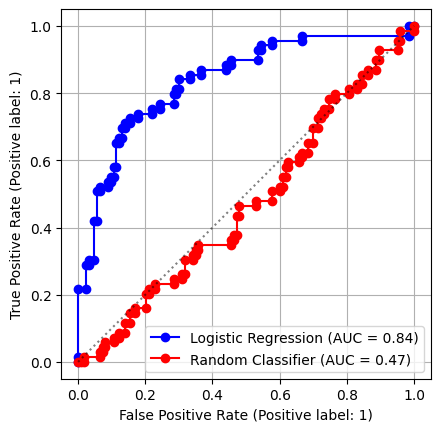

In [52]:
fig,ax=plt.subplots()
ax.set_aspect("equal")
RocCurveDisplay.from_predictions(y_test, ypred_logreg, color="blue", marker="o", ax=ax)
RocCurveDisplay.from_predictions(y_test, ypred_random, color="red", marker="o", ax=ax)
ax.plot([0,1], [0,1], alpha=0.5, color="black", linestyle=":")
ax.legend(["Logistic Regression (AUC = {})".format(round(auc_logreg, 2)), 
           "Random Classifier (AUC = {})".format(round(auc_random, 2))])
ax.grid(True);

Thus as expected the ROC curve with random guessing is close to the 45$^{\rm o}$straight line, as we would expect with an AUC close to 0.5.